# Introduction
This note contains a few examples demonstrating how to use the Circuit class in AUSCC. First you will need to import AUSCC and Sympy:

In [1]:
import auscc as au
import sympy as sp

In most cases one would you would probably also want QuTiP and Numpy imported, since these are heavily used. It also realy nice to set sympy to print latex:

In [2]:
sp.init_printing()

# Transmon with readout resonator
## Classical analysis
Let's build a transmon with readout resonator as in the original Koch et al paper:

In [3]:
print('LC oscillator')
Cr, Lr, Cin, Cg, EJ, CB, CJ, Vg, phi = sp.symbols('C_r, L_r, C_{in}, C_g, E_J, C_B, C_J, V_g, \Phi')
circ = au.Circuit()
circ.add_branch(start=0, end=1, type='Capacitor', symbol = Cr)
circ.add_branch(start=0, end=1, type='Inductor', symbol = Lr)
circ.add_branch(start=0, end=1, type='Capacitor', symbol = Cin, bias_voltage = Vg)
circ.add_branch(start=1, end=2, type='Capacitor', symbol = Cg)
circ.add_branch(start=0, end=2, type='Capacitor', symbol = CB)
circ.add_branch(start=0, end=2, type='Josephson Junction', symbol = EJ, bias_flux = -phi/2)
circ.add_branch(start=0, end=2, type='Josephson Junction', symbol = EJ, bias_flux = phi/2)
circ.ignore_coords(0)
print(circ)

LC oscillator
Circuit with 2 node(s)
Branches:
Capacitor           C_r        from 0 to 1
Inductor            L_r        from 0 to 1
Capacitor           C_{in}     from 0 to 1
Capacitor           C_g        from 1 to 2
Capacitor           C_B        from 0 to 2
Josephson junction  E_J        from 0 to 2
Josephson junction  E_J        from 0 to 2



We can get a symbolic expression for the potential by calling:

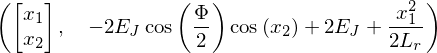

In [4]:
circ.potential()

Note that it also returns a vector of the position variables. And the capacitance matrix and kinetic energy can be found by:

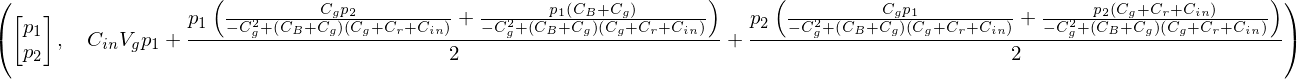

In [5]:
circ.kinetic()

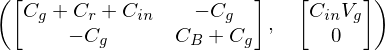

In [6]:
circ.C_mat()

The parameters of the circuit can be found using:

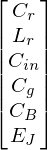

In [7]:
circ.circuit_symbols()

And if we have introduced any type of control, we can check these out using:

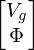

In [8]:
circ.control_symbols()

## Coordinates
The way the program figures out how many degrees of freedom there are in the system is by calling the __number_of_coords__ method:

In [9]:
circ.number_of_coords()

If we were to remove a coordinate, say the readout resonator, from the system we could do it like this:

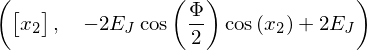

In [10]:
circ.ignore_coords(1)
circ.potential()

When we defined the circuit we removed the zero'th coordinate, assuming it was ground. We can include previously ignored coordinates using:

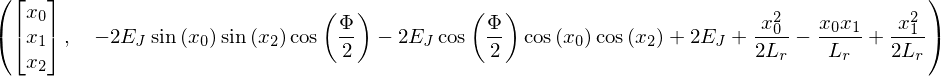

In [11]:
circ.use_coords(0,1)
circ.potential()

We could specify a transformation of the coordinates using:

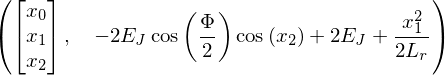

In [12]:
circ.transform_coords([1,1,1],[-1,1,0],[-1,0,1])
circ.potential()

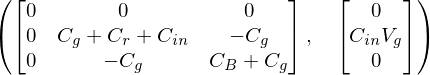

In [13]:
circ.C_mat()

Here it is pretty apparent that the ground node/COM coordinate is completely decoupled from the rest of the circuit. We can reset the coordinates by calling:

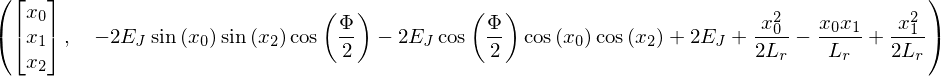

In [14]:
circ.reset_coords()
circ.potential()